# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET

# Load the file
file_path = 'summary.xml'
tree = ET.parse(file_path)
root = tree.getroot()



In [2]:
#Display the first 5 rows to ensure the dataset is loaded
data = pd.DataFrame([{key: step.get(key) for key in step.keys()} for step in root.findall('step')])
data.head()

,time,loaded,inserted,running,waiting,ended,arrived,collisions,teleports,halting,stopped,meanWaitingTime,meanTravelTime,meanSpeed,meanSpeedRelative,duration
0,0.00,4,1,1,0,0,0,0,0,1,0,0.00,-1.00,0.00,0.00,261
1,0.50,569,2,2,0,0,0,0,0,0,0,0.25,-1.00,8.39,0.54,89
2,1.00,569,3,3,0,0,0,0,0,1,0,0.33,-1.00,5.80,0.40,12
3,1.50,569,4,4,0,0,0,0,0,1,0,0.38,-1.00,4.88,0.36,26
4,2.00,569,6,6,0,0,0,0,0,2,0,0.42,-1.00,3.80,0.30,40


In [3]:
#explore the attributes type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   time               39 non-null     object
 1   loaded             39 non-null     object
 2   inserted           39 non-null     object
 3   running            39 non-null     object
 4   waiting            39 non-null     object
 5   ended              39 non-null     object
 6   arrived            39 non-null     object
 7   collisions         39 non-null     object
 8   teleports          39 non-null     object
 9   halting            39 non-null     object
 10  stopped            39 non-null     object
 11  meanWaitingTime    39 non-null     object
 12  meanTravelTime     39 non-null     object
 13  meanSpeed          39 non-null     object
 14  meanSpeedRelative  39 non-null     object
 15  duration           39 non-null     object
dtypes: object(16)
memory usage: 5.0+ KB


In [4]:
# Convert all columns to numeric 
data = data.apply(pd.to_numeric, errors='ignore')

C:\Users\Abdo\AppData\Local\Temp\ipykernel_6016\1175255188.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


In [5]:
#check on null values
data.isnull().sum()

time                 0
loaded               0
inserted             0
running              0
waiting              0
ended                0
arrived              0
collisions           0
teleports            0
halting              0
stopped              0
meanWaitingTime      0
meanTravelTime       0
meanSpeed            0
meanSpeedRelative    0
duration             0
dtype: int64

In [6]:
#Check for duplicates
data.duplicated().sum()

0

In [7]:
#stat info
data.describe()

,time,loaded,inserted,running,waiting,ended,arrived,collisions,teleports,halting,stopped,meanWaitingTime,meanTravelTime,meanSpeed,meanSpeedRelative,duration
count,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.0,39.0,39.0,39.000000,39.0,39.000000,39.0,39.000000,39.000000,39.000000
mean,9.500000,554.512821,28.923077,28.923077,0.0,0.0,0.0,0.0,0.0,1.538462,0.0,0.453333,-1.0,6.323077,0.638718,26.641026
std,5.700877,90.472407,17.060858,17.060858,0.0,0.0,0.0,0.0,0.0,0.822261,0.0,0.088625,0.0,1.548463,0.176623,41.735689
min,0.000000,4.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,-1.0,0.000000,0.000000,2.000000
25%,4.750000,569.000000,15.000000,15.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.465000,-1.0,5.700000,0.565000,10.500000
50%,9.500000,569.000000,29.000000,29.000000,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.480000,-1.0,6.890000,0.730000,15.000000
75%,14.250000,569.000000,44.000000,44.000000,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.490000,-1.0,7.170000,0.755000,29.000000
max,19.000000,569.000000,57.000000,57.000000,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.490000,-1.0,8.390000,0.780000,261.000000


# Vizualizations

- Box plot

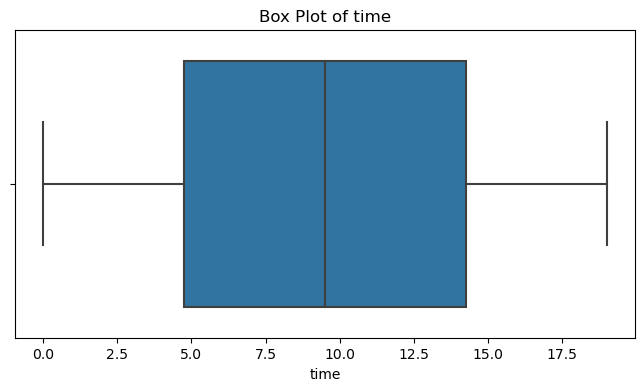

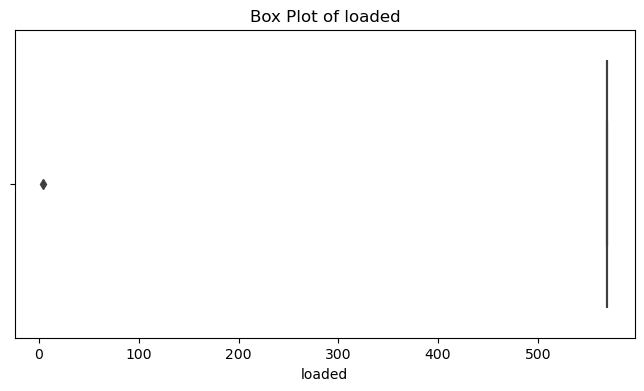

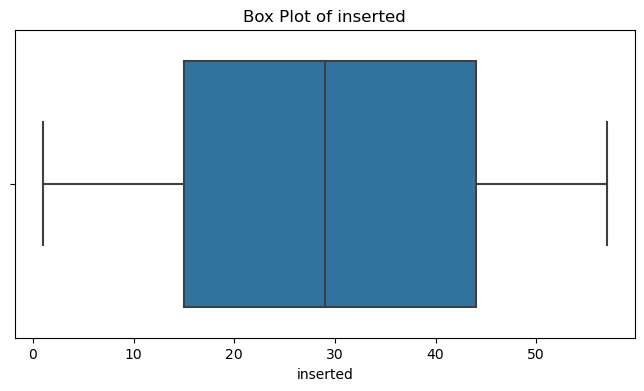

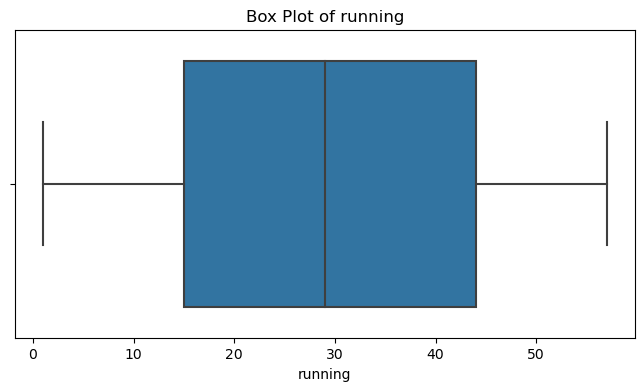

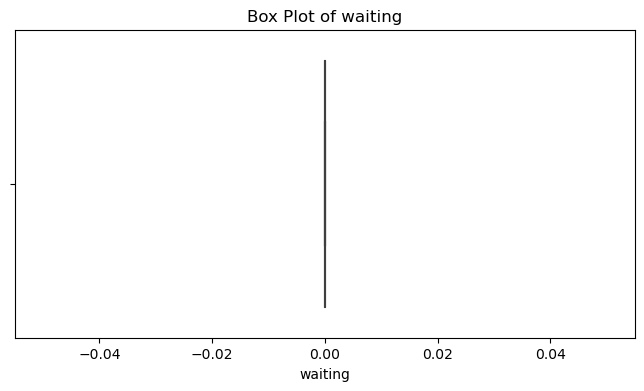

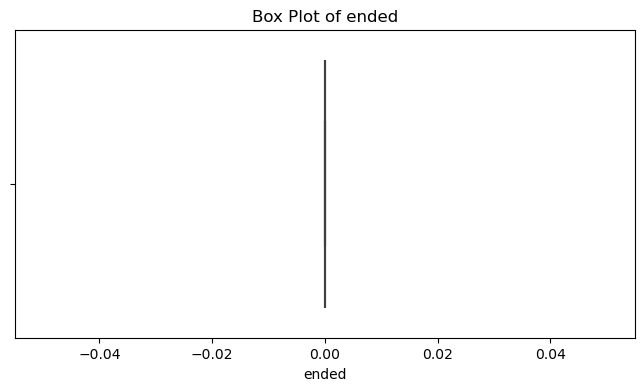

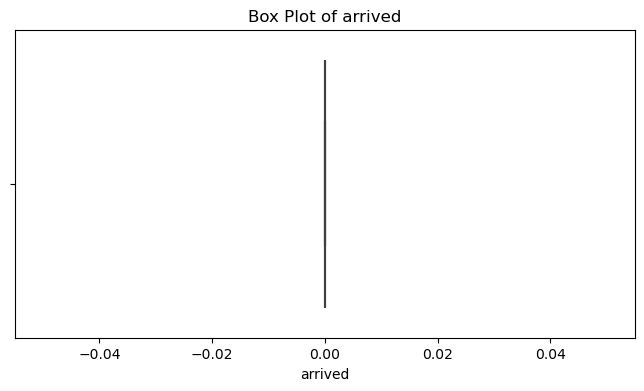

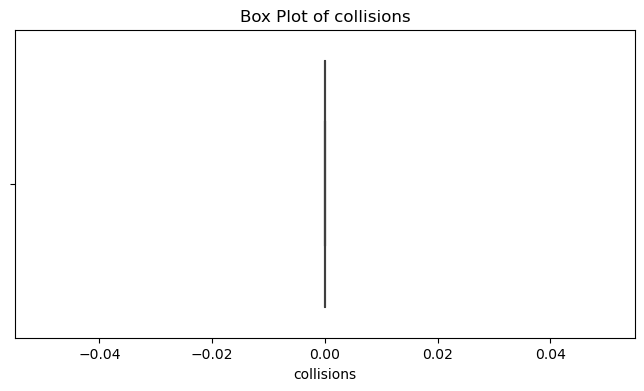

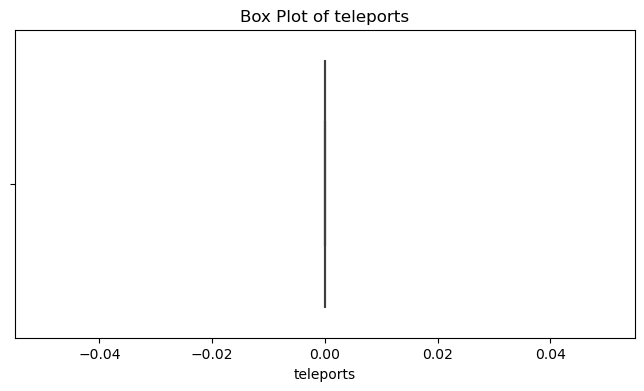

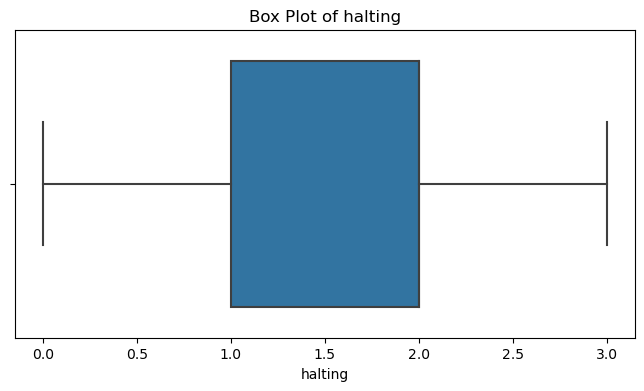

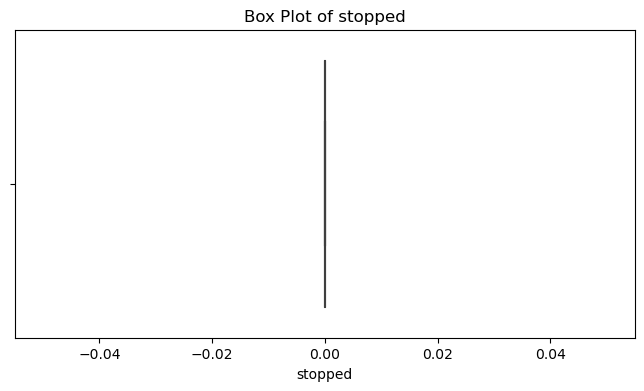

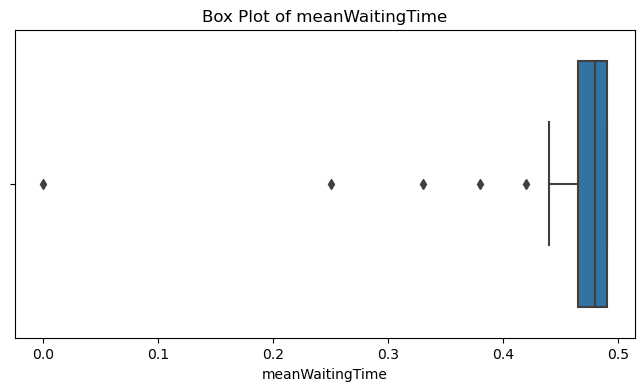

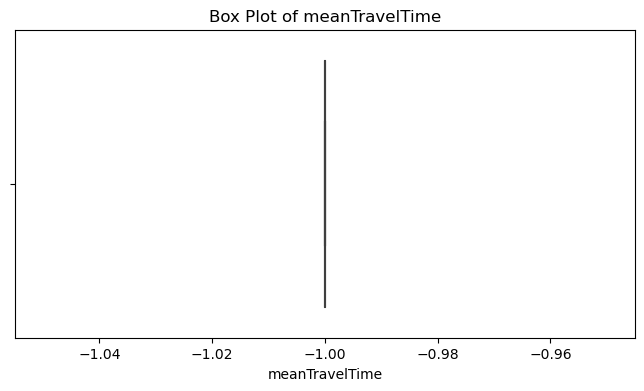

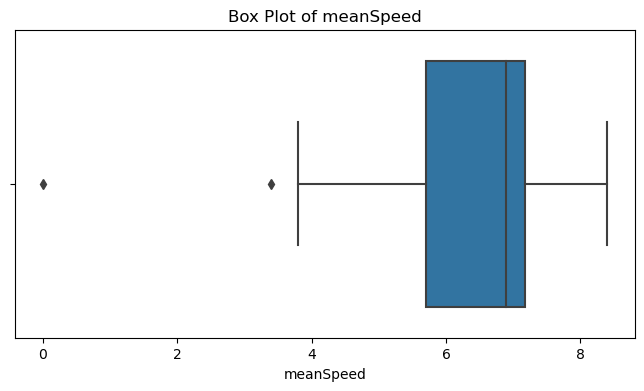

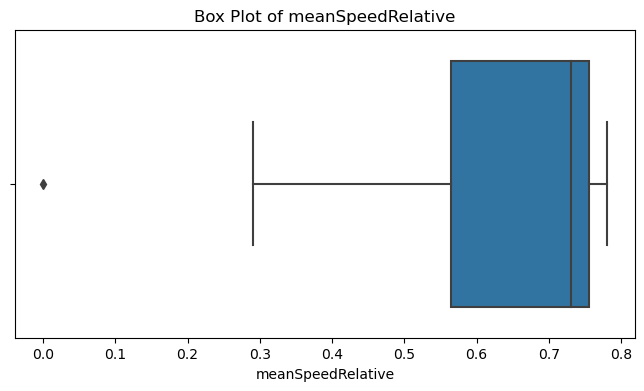

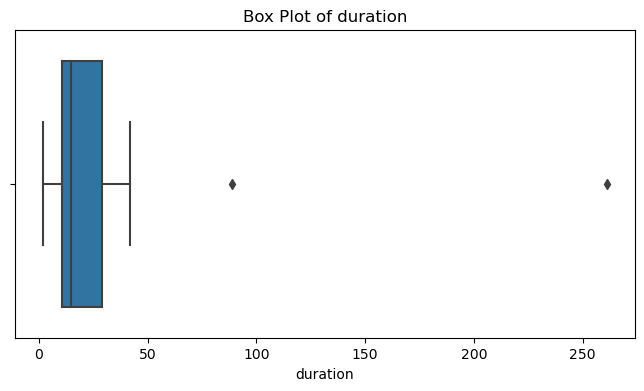

In [11]:
num_cols = data.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

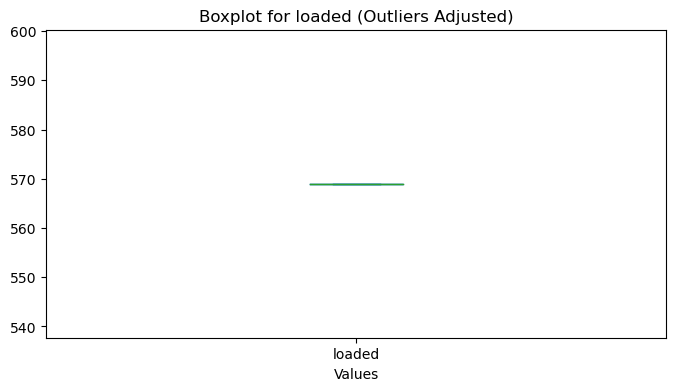

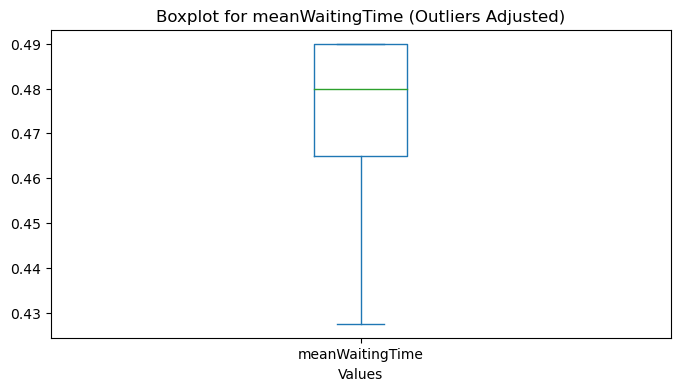

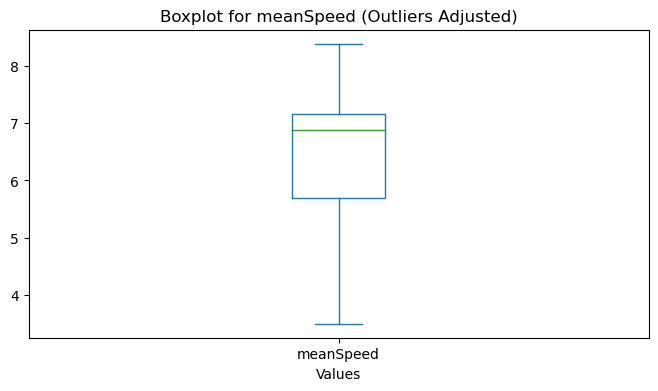

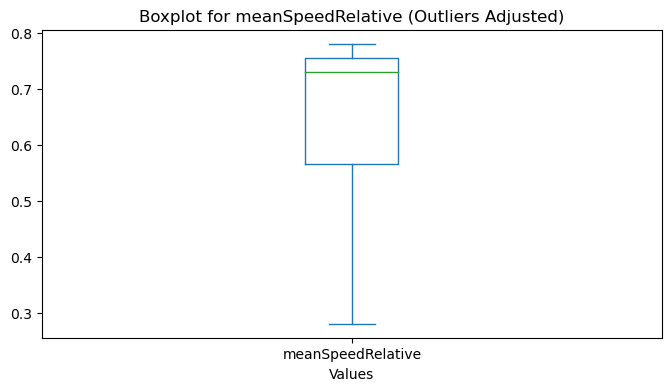

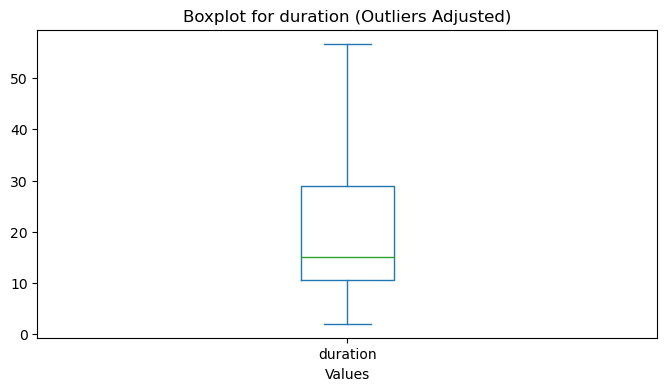

In [15]:
# Columns for outlier adjustment
columns_to_adjust = ['loaded', 'meanWaitingTime', 'meanSpeed', 'meanSpeedRelative', 'duration']

# Apply IQR method for outlier adjustment
for col in columns_to_adjust:
    if col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1

        # Define upper and lower bounds
        upper = q3 + (1.5 * iqr)
        lower = q1 - (1.5 * iqr)

        # Adjust outliers
        data.loc[data[col] > upper, col] = upper
        data.loc[data[col] < lower, col] = lower

        # Plot the boxplot for the column
        plt.figure(figsize=(8, 4))
        data[col].plot(kind='box')
        plt.title(f"Boxplot for {col} (Outliers Adjusted)")
        plt.xlabel("Values")
        plt.show()

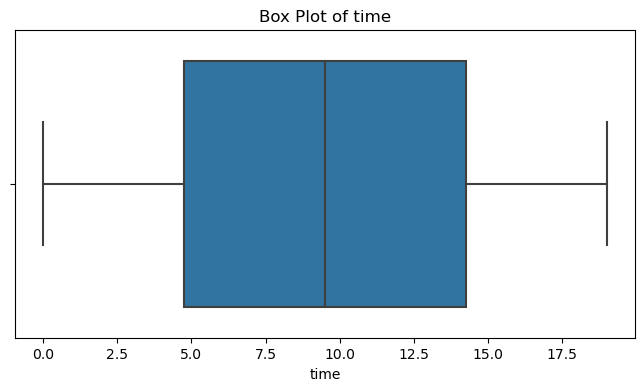

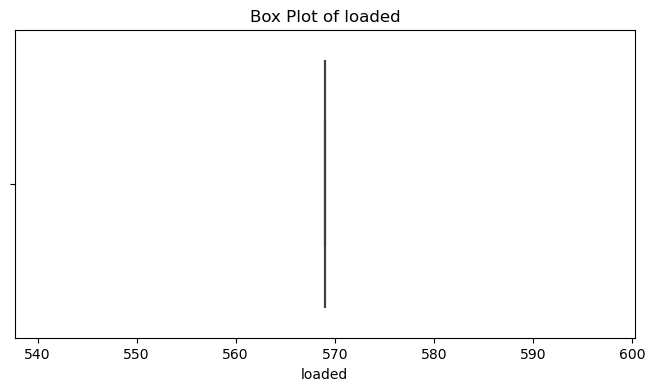

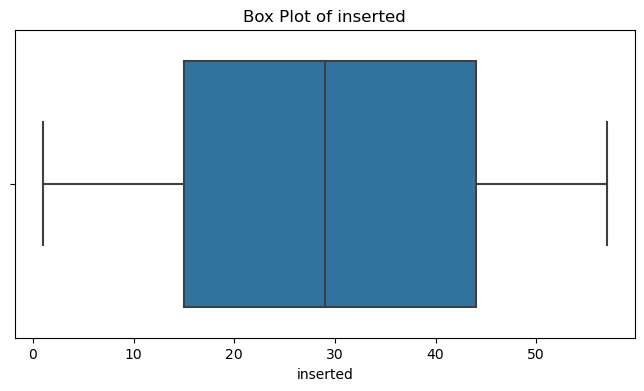

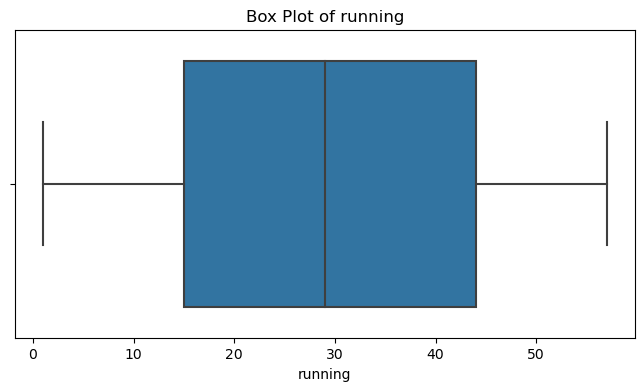

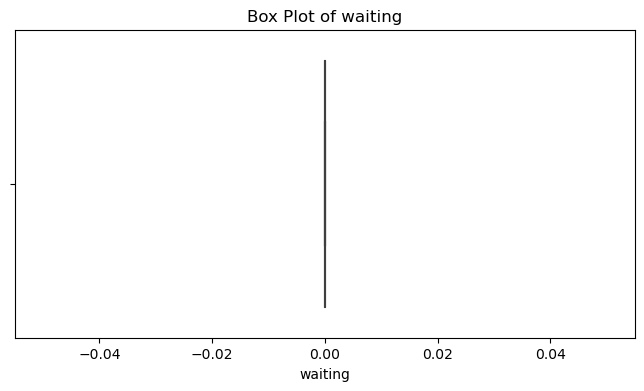

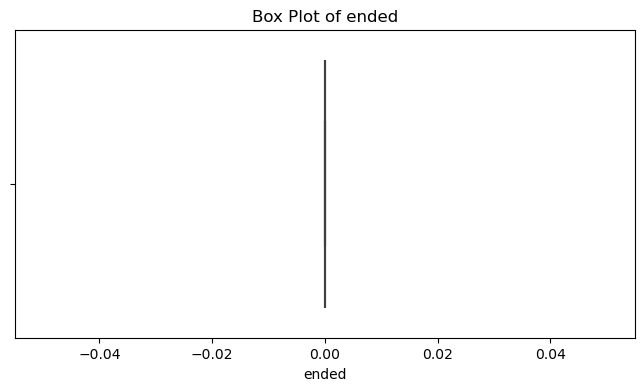

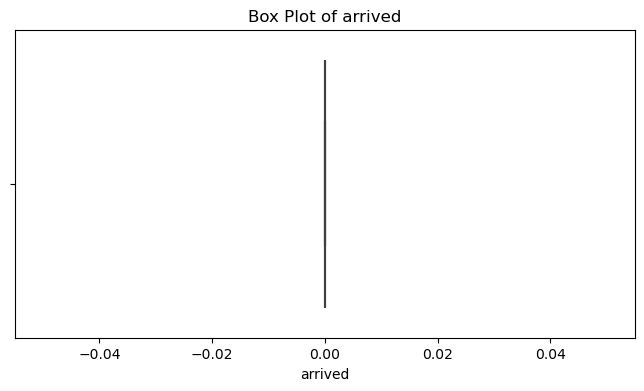

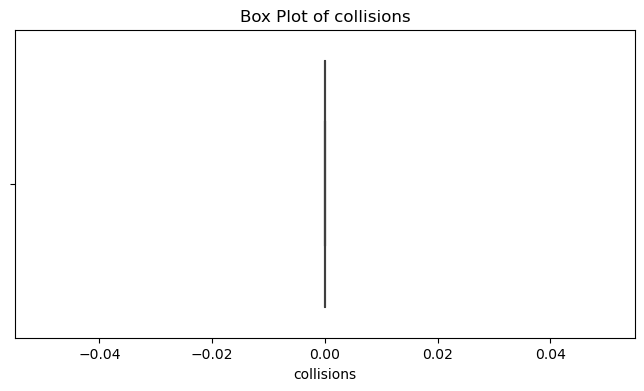

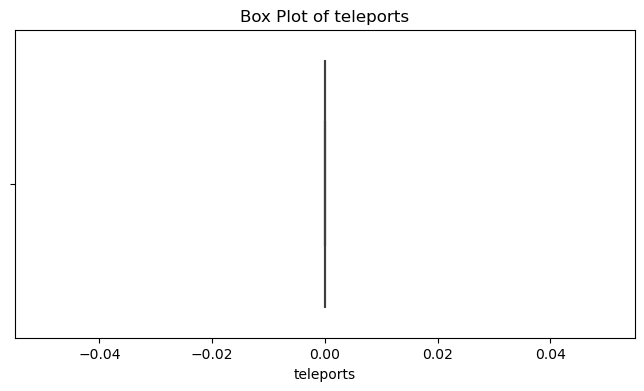

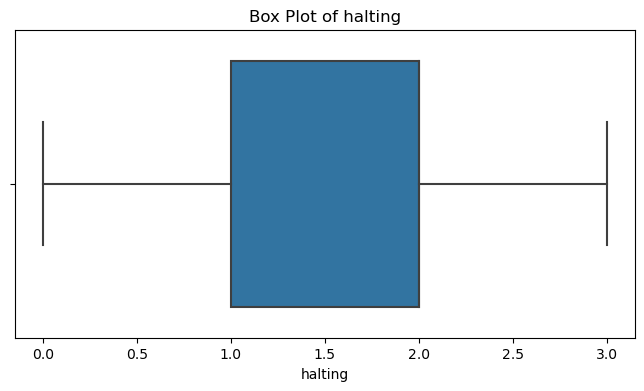

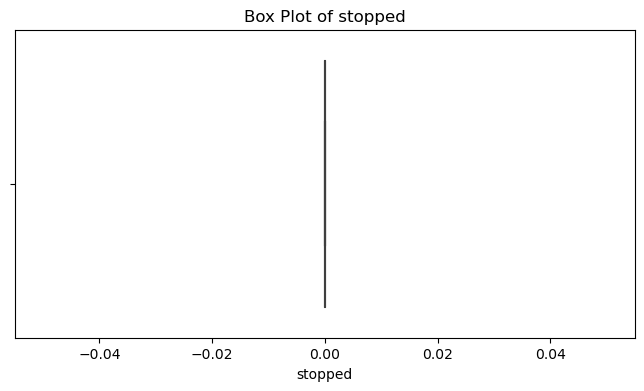

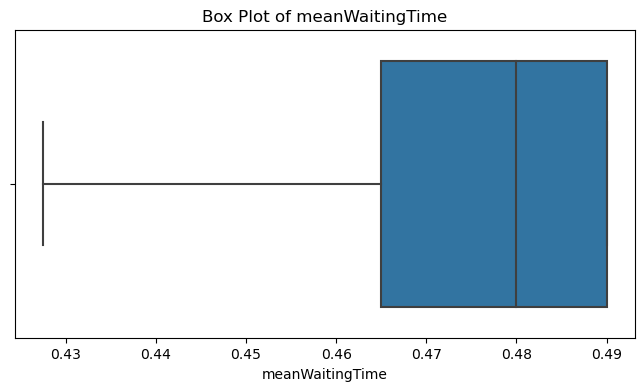

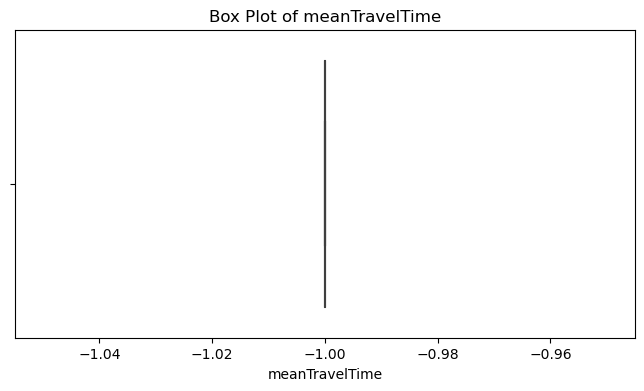

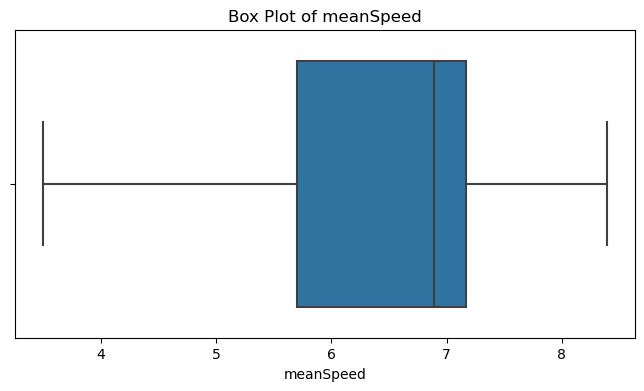

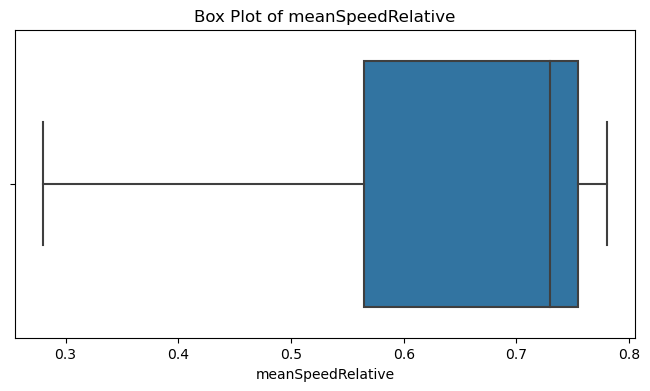

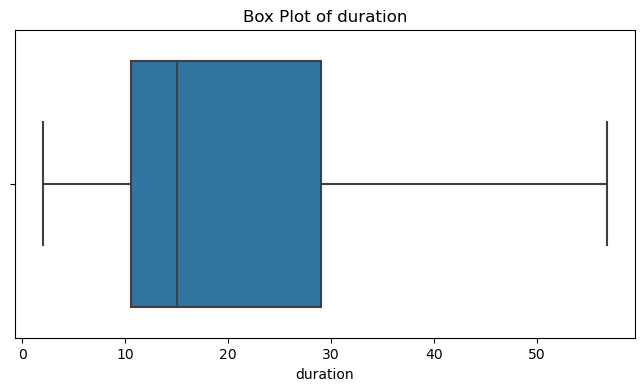

In [16]:
num_cols = data.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# 2-Histogram

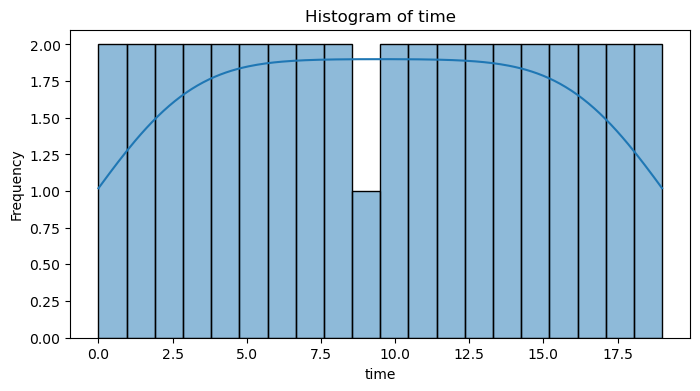

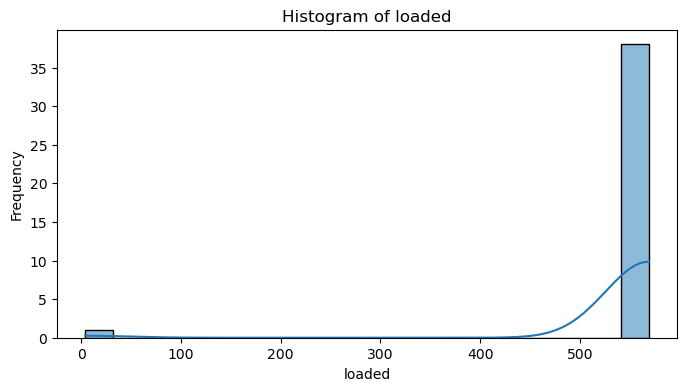

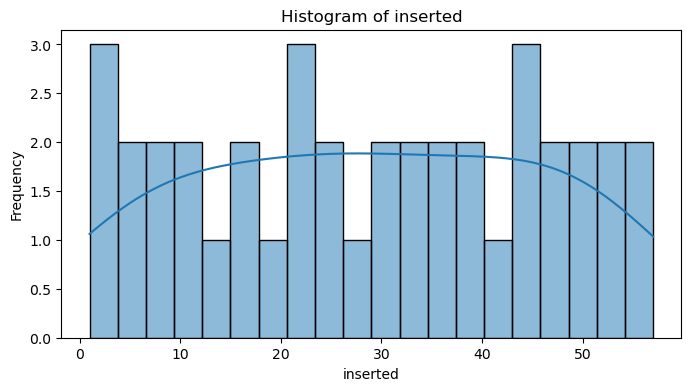

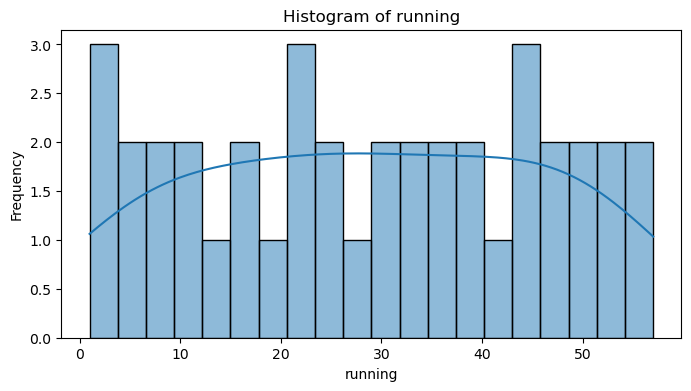

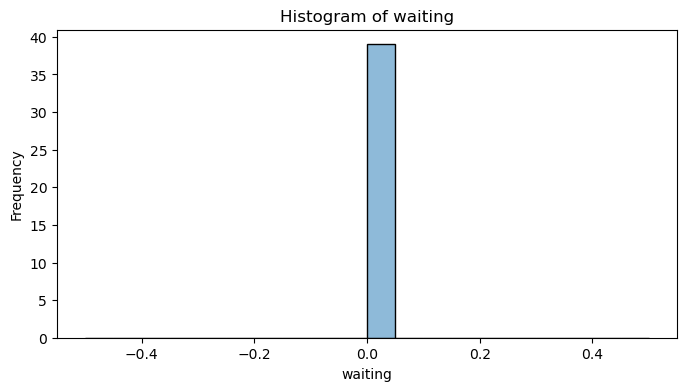

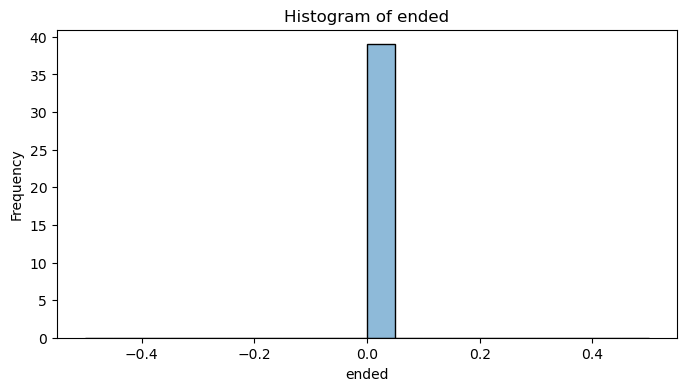

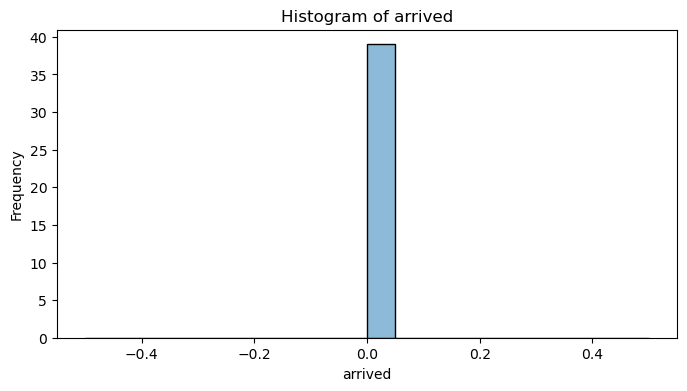

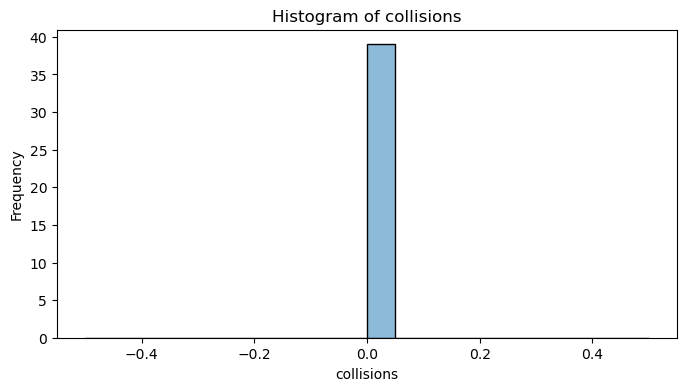

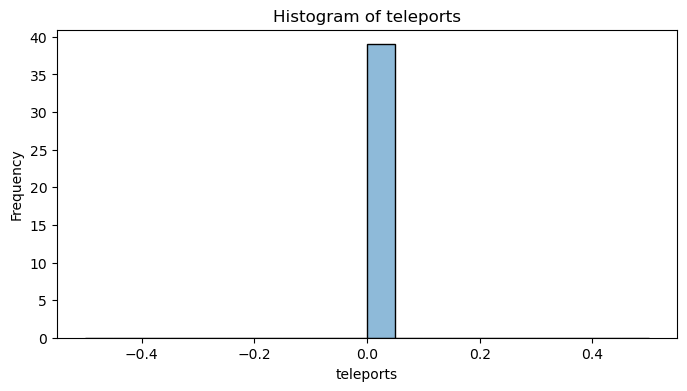

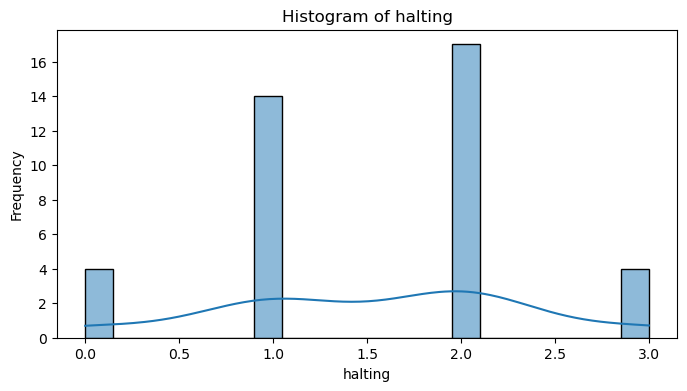

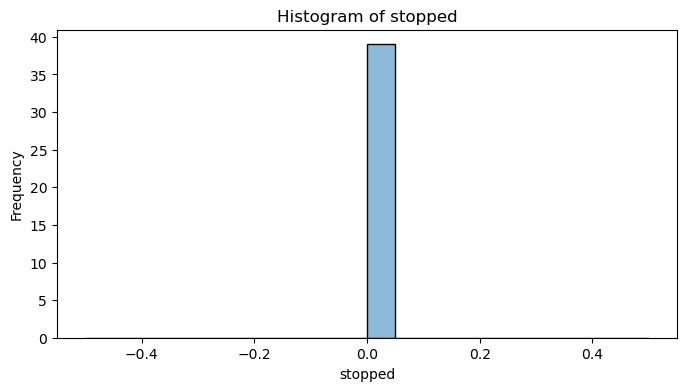

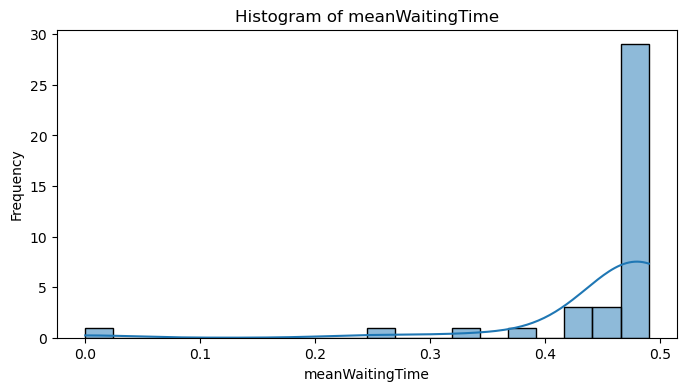

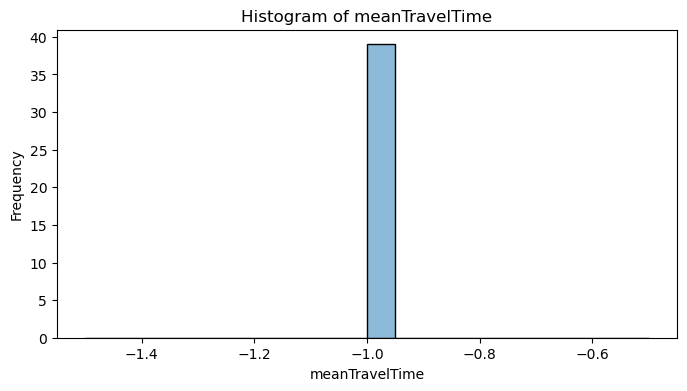

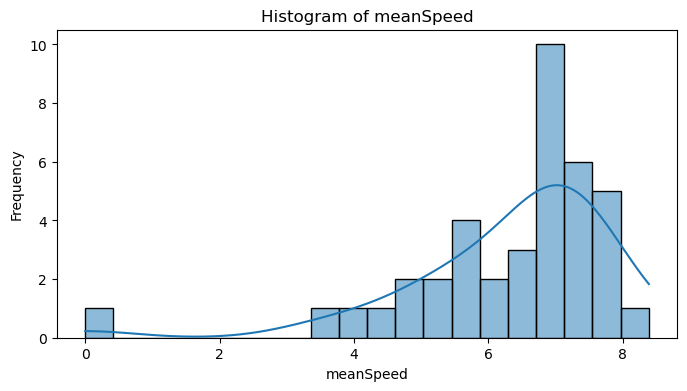

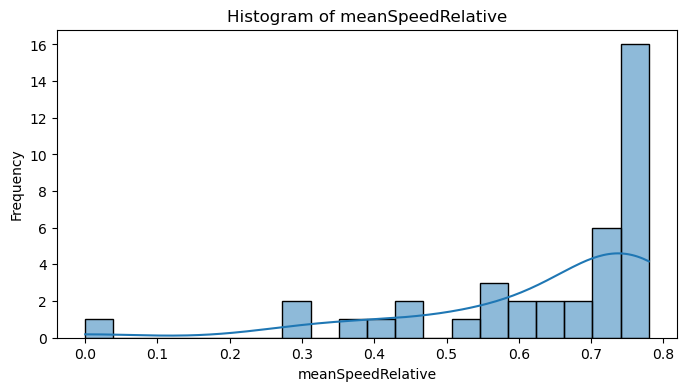

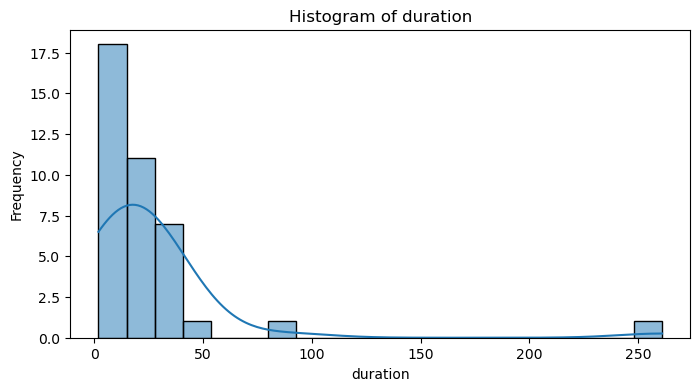

In [12]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Heat map

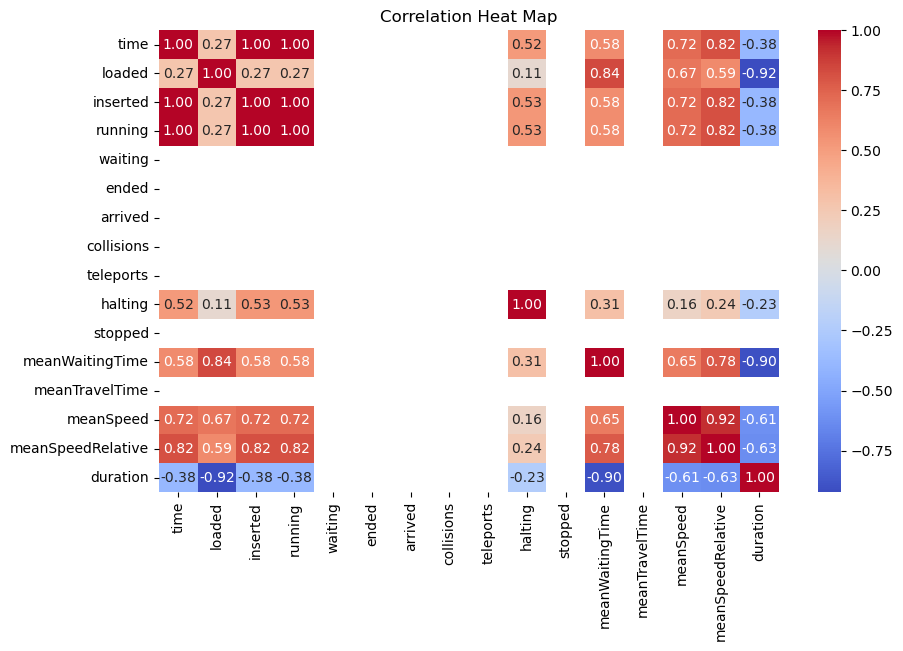

In [14]:
if len(num_cols) > 1:
    plt.figure(figsize=(10, 6))
    correlation_matrix = data[num_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Correlation Heat Map')
    plt.show()